In [1]:
import BondGraphTools as bgt

In [2]:
model=bgt.new(name='circuit_3')

In [3]:
# Parameters' values

C1_value=1000*1e-6    #(1000 uF)
C2_value=470*1e-6     #(470 uF)
L1_value=100*1e-6     #(100 uH)
R1_value=10*1e3       #(10 k)
R2_value=10*1e3       #(10 k)
R3_value=1*1e3        #(1 k)
R4_value=1*1e3        #(1 k)

In [4]:
C1=bgt.new("C", value=C1_value)
C2=bgt.new("C", value=C2_value)
L1=bgt.new("I", value=L1_value)
R1=bgt.new("R", value=R1_value)
R2=bgt.new("R", value=R2_value)
R3=bgt.new("R", value=R3_value)
R4=bgt.new("R", value=R4_value)

In [5]:
zero_junc=bgt.new("0")
one_junc1=bgt.new("1")
one_junc2=bgt.new("1")

In [6]:
bgt.add(model,C1,C2,L1,R1,R2,R3,R4,zero_junc,one_junc1,one_junc2)

In [7]:
bgt.connect(C1,one_junc1)
bgt.connect(one_junc1,R1)
bgt.connect(one_junc1,R4)
bgt.connect(one_junc1,zero_junc)
bgt.connect(zero_junc,C2)
bgt.connect(zero_junc,one_junc2)
bgt.connect(one_junc2,R2)
bgt.connect(one_junc2,R3)
bgt.connect(one_junc2,L1)

In [8]:
bgt.draw(model)

In [9]:
timespan=[0,100]

In [10]:
model.state_vars

{'x_0': (C: C1, 'q_0'), 'x_1': (C: C2, 'q_0'), 'x_2': (I: I3, 'p_0')}

In [11]:
x0={"x_0":1, "x_1":0, "x_2":0}

In [12]:
model.constitutive_relations

[dx_0 + x_0/11 - 193423597678917*x_1/1000000000000000,
 dx_1 - x_0/11 + 193423597678917*x_1/1000000000000000 + 10000*x_2,
 dx_2 - 212765957446809*x_1/100000000000 + 110000000*x_2]

In [13]:
t, x = bgt.simulate(model, timespan=timespan, x0=x0)

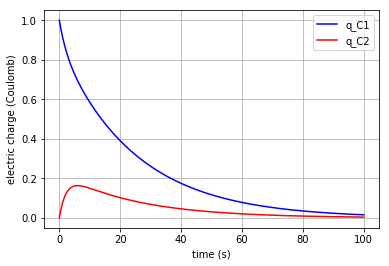

In [14]:
import matplotlib.pyplot as plt
plt.plot(t,x[:,0], '-b', label='q_C1')
plt.plot(t,x[:,1], '-r', label='q_C2')
plt.xlabel("time (s)")
plt.ylabel("electric charge (Coulomb)")
plt.legend(loc='upper right')
plt.grid()

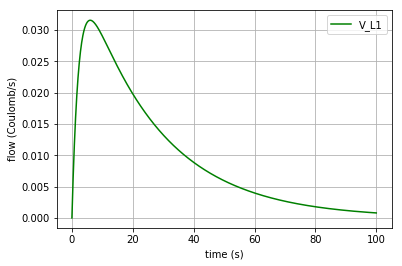

In [15]:
v_L1=x[:,2]/L1._params['L']
plt.plot(t,v_L1, '-g', label='V_L1')
plt.xlabel("time (s)")
plt.ylabel("flow (Coulomb/s)")
plt.legend(loc='upper right')
plt.grid()

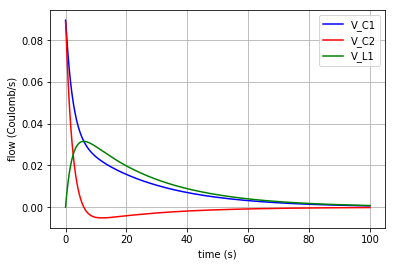

In [16]:
# dq_C1/dt = v_C1 (flow in C1)
import numpy as np
f = np.array(x[:,0], dtype=float)
slope=np.gradient(f,0.1)
v_C1=-slope
# dq_C2/dt = v_C2 (flow in C2)
f = np.array(x[:,1], dtype=float)
slope=np.gradient(f,0.1)
v_C2=slope
# dV_L1/dt = a_L1 
#v_L1=v_C1-v_C2
a_L1=np.gradient(v_L1,0.1)


plt.plot(t,v_C1, '-b', label='V_C1')
plt.plot(t,v_C2, '-r', label='V_C2')
plt.plot(t,v_L1, '-g', label='V_L1')
plt.xlabel("time (s)")
plt.ylabel("flow (Coulomb/s)")
plt.legend(loc='upper right')
plt.grid()

In [18]:
u_C1=x[:,0]/C1._params['C']
u_C2=x[:,1]/C2._params['C']

u_L1=L1._params['L']*a_L1

u_R1=R1._params['r']*v_C1
u_R2=R2._params['r']*v_L1
u_R3=R3._params['r']*v_L1
u_R4=R4._params['r']*v_C1


Text(0,0.5,'Potential (J/Coulomb)')

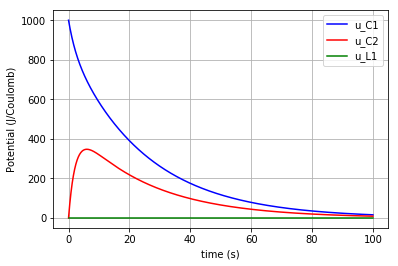

In [19]:
for u, c, label in [(u_C1,'-b','u_C1'), (u_C2,'-r','u_C2'), (u_L1,'-g','u_L1')]:
    fig=plt.plot(t,u,c,label=label)
    plt.legend(loc='upper right')
    
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("Potential (J/Coulomb)")


Text(0,0.5,'Potential (J/Coulomb)')

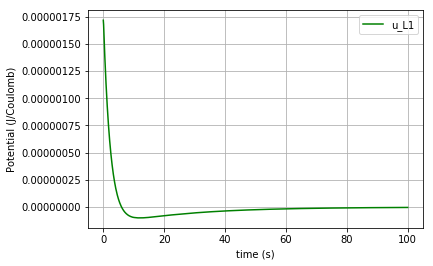

In [20]:
fig=plt.plot(t,u_L1,'-g', label='u_L1')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel("time (s)")
plt.ylabel("Potential (J/Coulomb)")